In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
df2 = pd.read_csv("multiTimeline.csv", header=1)
df2[['Year', 'month']] = df2['Month'].str.split('-', expand=True)

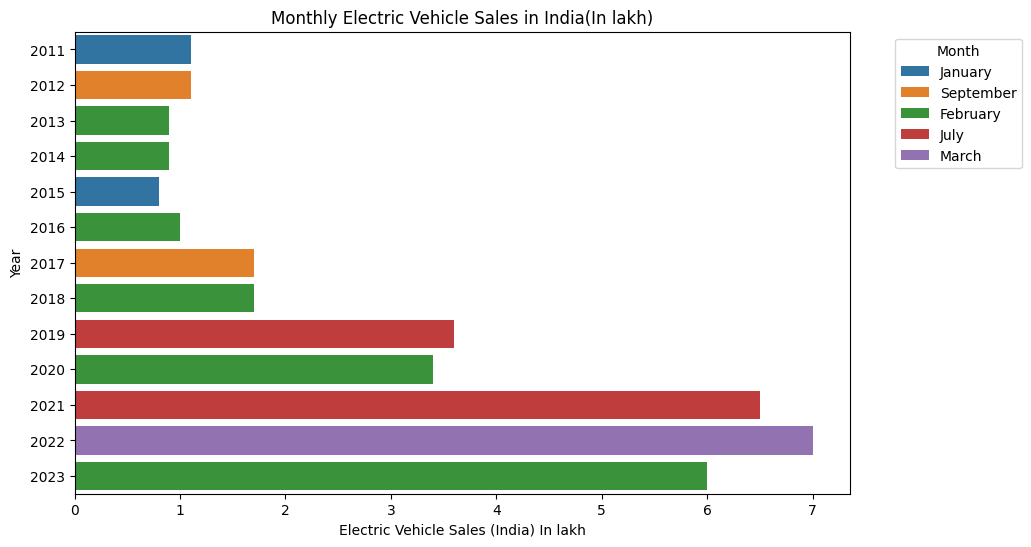

In [5]:
data = df2.groupby("Year")["Electric vehicle: (India)"].sum()
data = data.rename("Electric vehicle (in lakh)").to_frame()
data["Electric vehicle (in lakh)"] = data["Electric vehicle (in lakh)"]*0.01
result = df2.groupby('Year').apply(lambda x: x.loc[x["Electric vehicle: (India)"].idxmax()])
month_wise = result[["month","Electric vehicle: (India)","Year"]]
month_wise.index = month_wise.index.astype(int)
month_wise = month_wise[month_wise.index > 2010]
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
month_wise["Electric vehicle: (India)"] = month_wise["Electric vehicle: (India)"]*0.1
month_wise = month_wise.astype(float)
month_wise.month = month_wise.month.replace(month_mapping)
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x=month_wise["Electric vehicle: (India)"], y=month_wise.index, hue=month_wise["month"], orient="horizontal")
plt.xlabel('Electric Vehicle Sales (India) In lakh')
plt.ylabel('Year')
plt.title('Monthly Electric Vehicle Sales in India(In lakh)')
# plt.gca().set_aspect('equal')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')  # Add a legend

plt.show()

In [6]:
def calculate_cagr(b, e, n):
    cagr = ((e / b) ** (1 / n)) - 1
    cagr_percentage = cagr * 100
    return round(cagr_percentage,2)
calculate_cagr(data.loc["2016"][0], data.loc["2022"][0], 6)


40.13

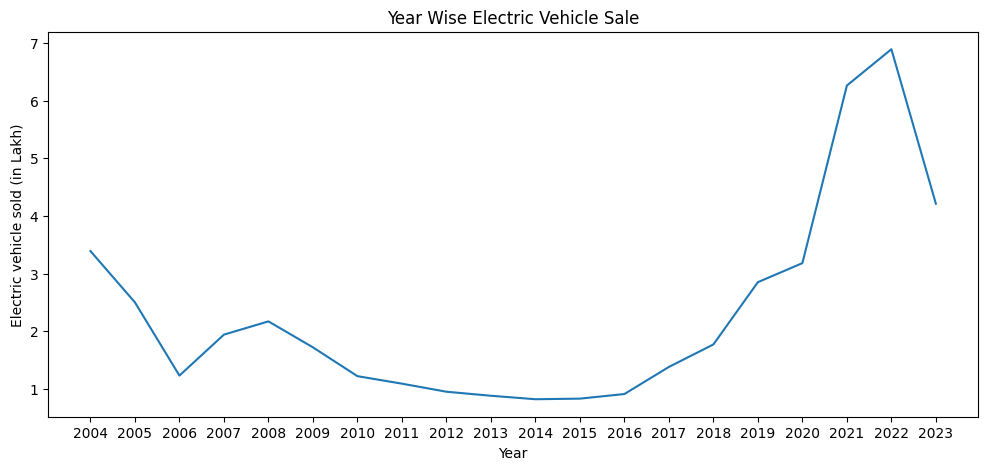

In [7]:
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(data)
plt.xlabel("Year")
plt.ylabel("Electric vehicle sold (in Lakh)")
plt.title("Year Wise Electric Vehicle Sale")
plt.show()

EV sales growth was stangnant until 2016 after that it grows significantly with 40.3% CAGR
Maximum Sales can be observed in either January, February, March or July, September month.

###EV Charging Stations Sanctioned on Highways/ Expressways

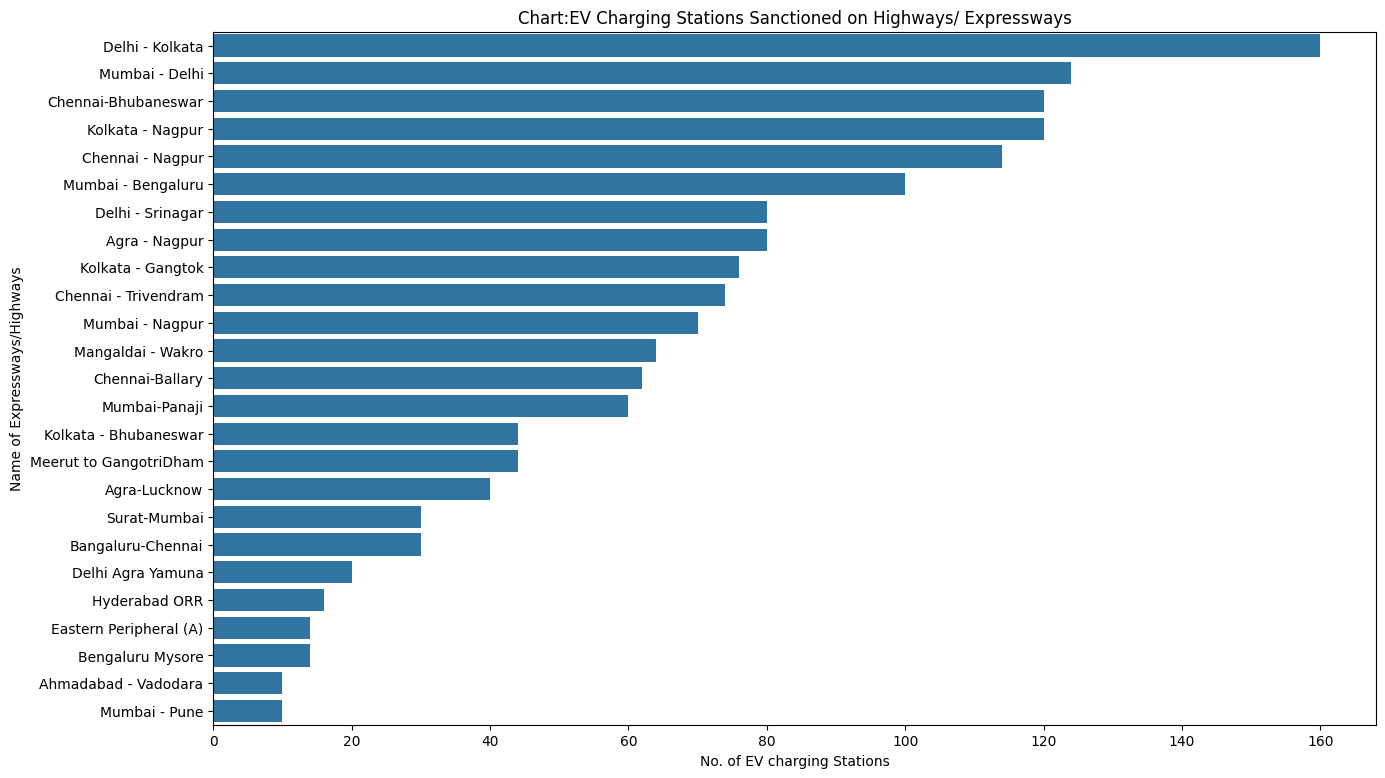

In [9]:
df3 = pd.read_csv("evdata.csv")
df3.drop(index=25, inplace=True)
df3.sort_values("EV Charging Stations Sanctioned", inplace=True, ascending=False)
fig, ax = plt.subplots(figsize=(15, 9))
sns.barplot(y=df3["Expressways/Highways"], x=df3["EV Charging Stations Sanctioned"],orient="horizontal")
plt.xlabel("No. of EV charging Stations")
plt.ylabel("Name of Expressways/Highways")
plt.title("Chart:EV Charging Stations Sanctioned on Highways/ Expressways")
plt.show()

Maximum no. of charging stations are installed at Delhi-Kolkata i.e. Nearly 160.
Chenni, kolkata, Nagpur, Delhi are top cities through which highway pass which has highest no. of charging station.

In [56]:
df = pd.read_csv("ElectricCarData_Clean.csv")
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [57]:

df.head(10)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
5,Lucid,Air,2.8,250,610,180,620,Yes,AWD,Type 2 CCS,Sedan,F,5,105000
6,Volkswagen,e-Golf,9.6,150,190,168,220,Yes,FWD,Type 2 CCS,Hatchback,C,5,31900
7,Peugeot,e-208,8.1,150,275,164,420,Yes,FWD,Type 2 CCS,Hatchback,B,5,29682
8,Tesla,Model 3 Standard Range Plus,5.6,225,310,153,650,Yes,RWD,Type 2 CCS,Sedan,D,5,46380
9,Audi,Q4 e-tron,6.3,180,400,193,540,Yes,AWD,Type 2 CCS,SUV,D,5,55000


In [58]:
df.shape

(103, 14)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [60]:
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


In [61]:
ilocfunc = df.iloc[:,0:9]
ilocfunc

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD
2,Polestar,2,4.7,210,400,181,620,Yes,AWD
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD
4,Honda,e,9.5,145,170,168,190,Yes,RWD
...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD


In [62]:
df.isnull().sum()

,0
Brand,0
Model,0
AccelSec,0
TopSpeed_KmH,0
Range_Km,0
Efficiency_WhKm,0
FastCharge_KmH,0
RapidCharge,0
PowerTrain,0
PlugType,0


In [63]:
df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [64]:
df['Brand'] = df['Brand'].astype('category')
df['Model'] = df['Model'].astype('category')
df['AccelSec'] = df['AccelSec'].astype('category')
df['TopSpeed_KmH'] = df['TopSpeed_KmH'].astype('category')
df['Range_Km'] = df['Range_Km'].astype('category')
df['Efficiency_WhKm'] = df['Efficiency_WhKm'].astype('category')
df['FastCharge_KmH'] = df['FastCharge_KmH'].astype('category')
df['RapidCharge'] = df['RapidCharge'].astype('category')
df['PowerTrain'] = df['PowerTrain'].astype('category')
df['PlugType'] = df['PlugType'].astype('category')
df['BodyStyle'] = df['BodyStyle'].astype('category')
df['Segment'] = df['Segment'].astype('category')
df['Seats'] = df['Seats'].astype('category')
df['PriceEuro'] = df['PriceEuro'].astype('category')

In [65]:
df.dtypes

,0
Brand,category
Model,category
AccelSec,category
TopSpeed_KmH,category
Range_Km,category
Efficiency_WhKm,category
FastCharge_KmH,category
RapidCharge,category
PowerTrain,category
PlugType,category


In [66]:
df['Brand'] = df['Brand'].cat.codes
df['Model'] = df['Model'].cat.codes
df['AccelSec'] = df['AccelSec'].cat.codes
df['TopSpeed_KmH'] = df['TopSpeed_KmH'].cat.codes
df['Range_Km'] = df['Range_Km'].cat.codes
df['Efficiency_WhKm'] = df['Efficiency_WhKm'].cat.codes
df['FastCharge_KmH'] = df['FastCharge_KmH'].cat.codes
df['RapidCharge'] = df['RapidCharge'].cat.codes
df['PowerTrain'] = df['PowerTrain'].cat.codes
df['PlugType'] = df['PlugType'].cat.codes
df['BodyStyle'] = df['BodyStyle'].cat.codes
df['Segment'] = df['Segment'].cat.codes
df['Seats'] = df['Seats'].cat.codes
df['PriceEuro'] = df['PriceEuro'].cat.codes

In [67]:
df.dtypes
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,30,46,11,18,42,5,50,1,0,2,7,3,2,52
1,31,33,46,9,15,9,7,1,2,2,1,2,2,11
2,23,0,12,15,35,21,36,1,0,2,2,3,2,53
3,2,101,26,12,28,32,32,1,2,2,6,3,2,64
4,9,78,41,5,4,10,2,1,2,2,1,1,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,20,6,30,9,24,25,21,1,1,2,1,2,2,43
99,1,94,10,15,25,49,30,1,0,2,6,4,2,75
100,20,8,20,14,23,27,21,1,0,2,1,2,2,47
101,20,10,16,14,31,44,22,1,0,2,1,2,2,61


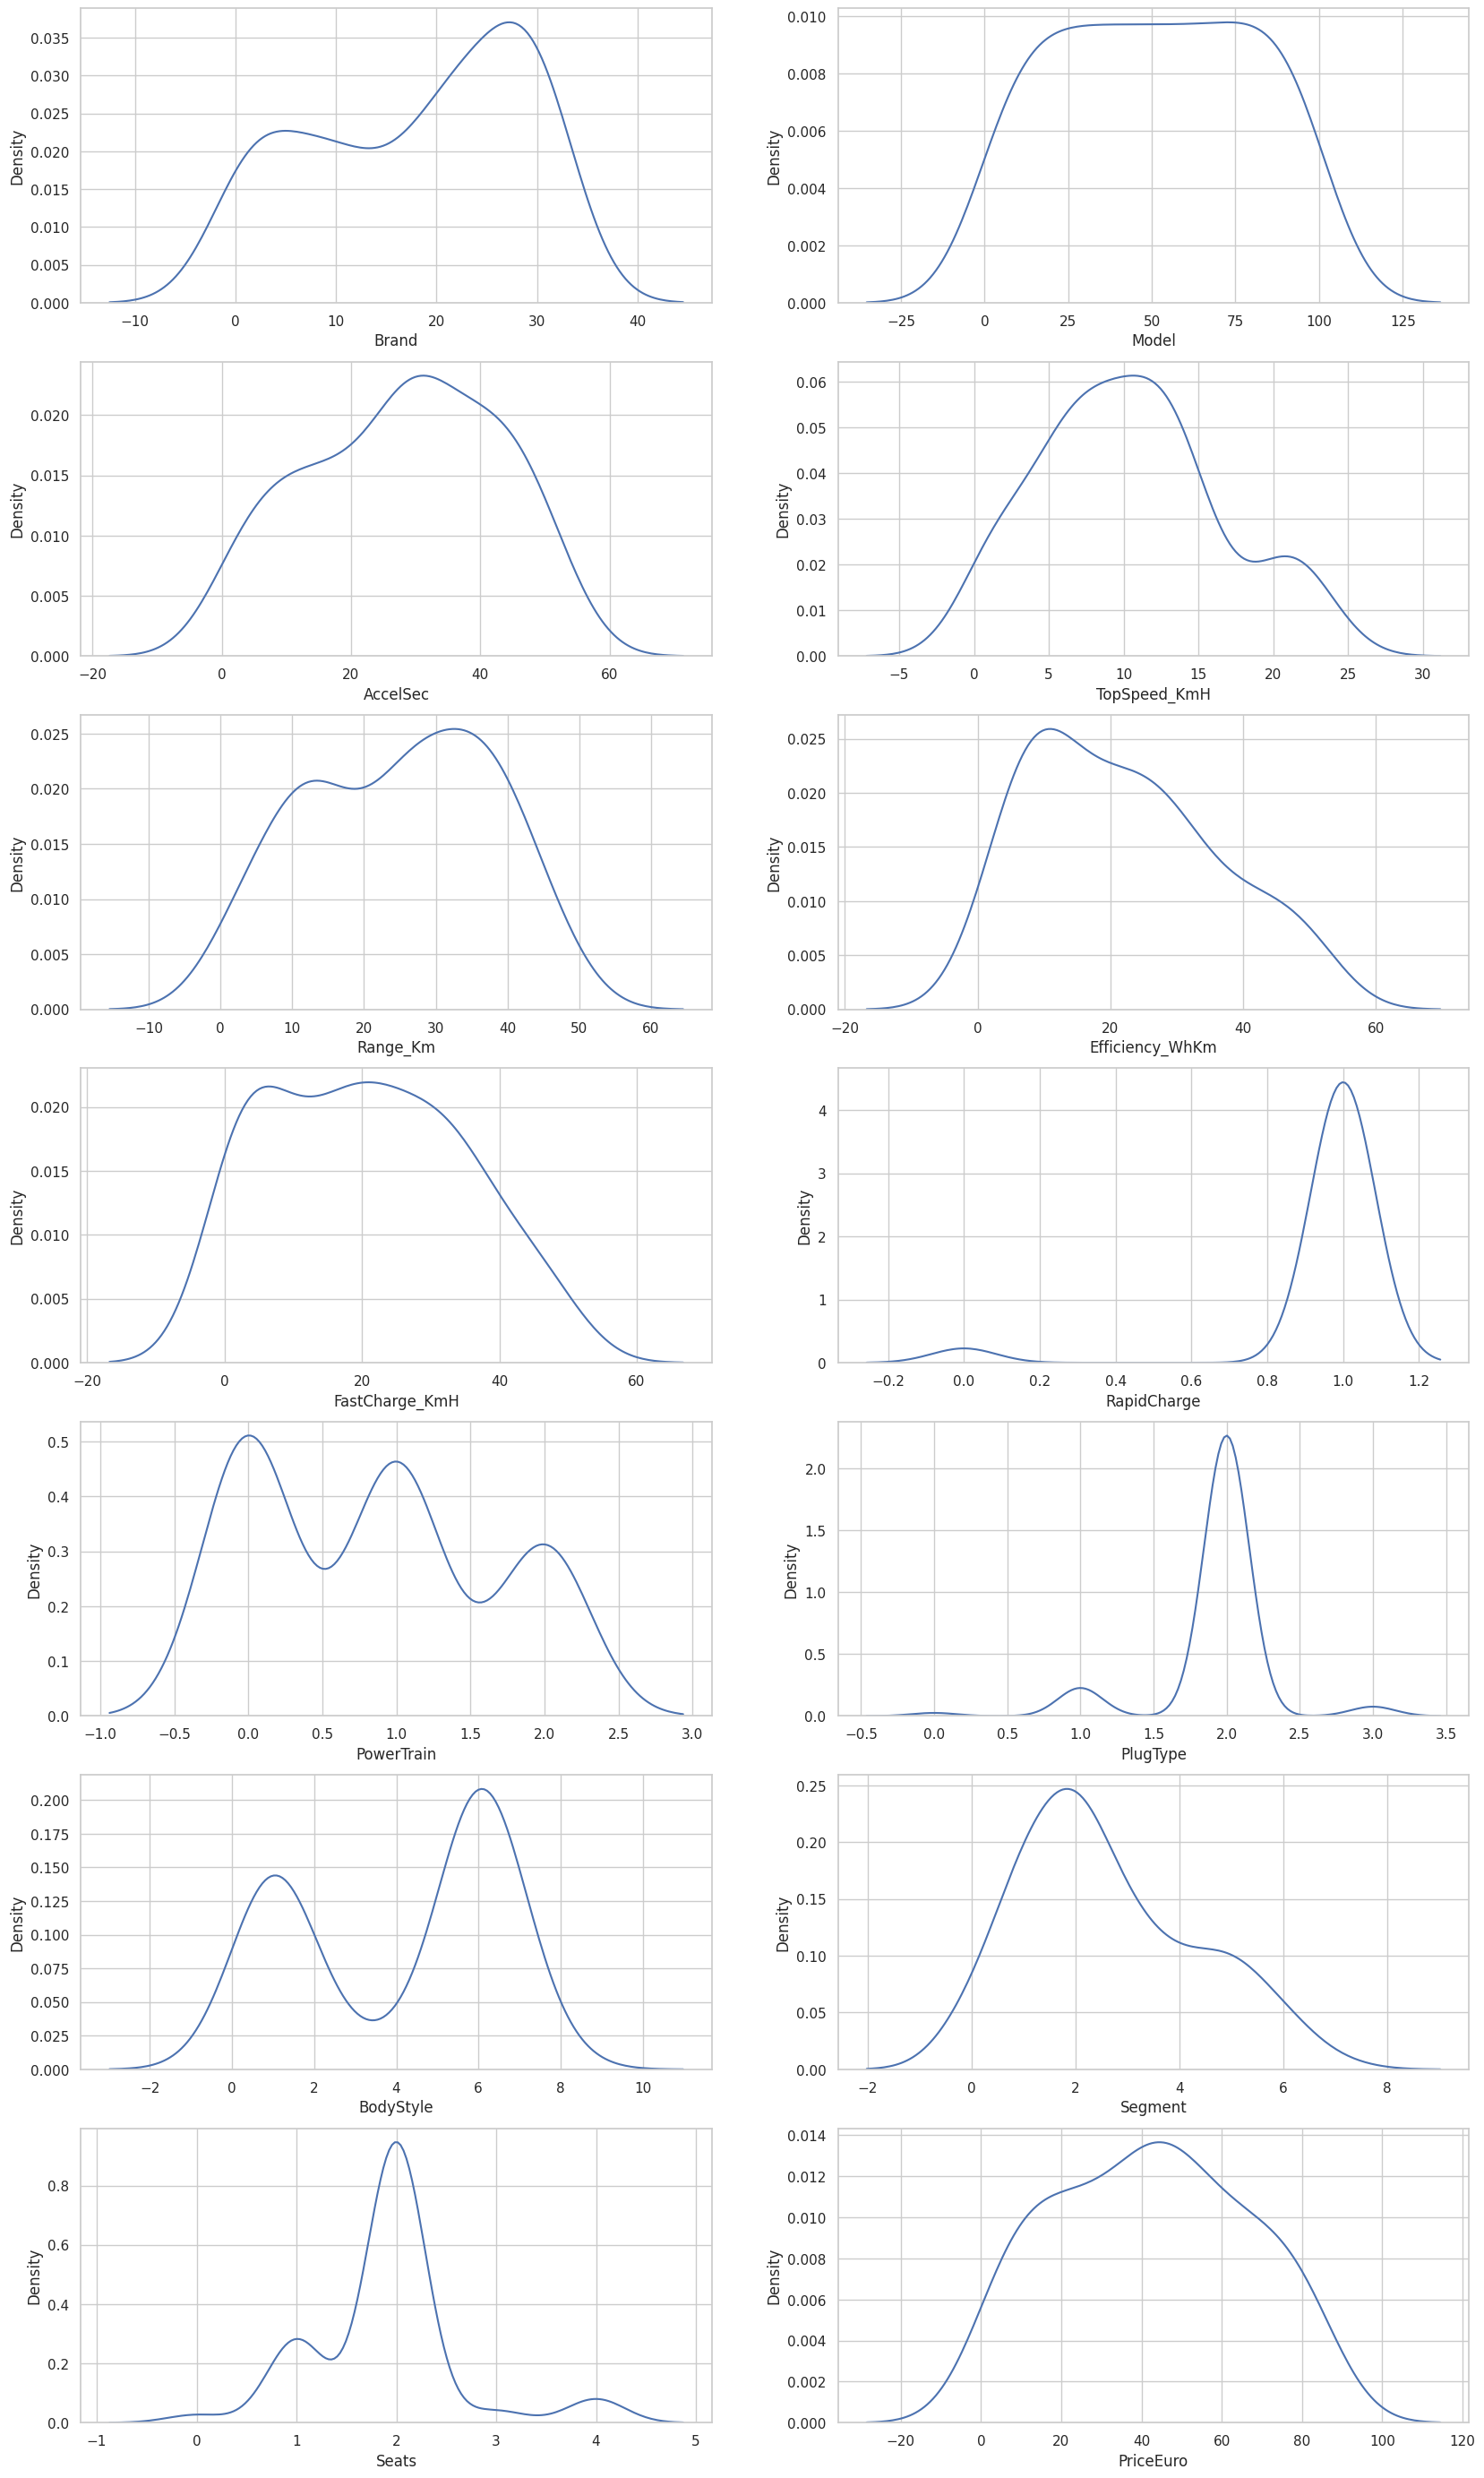

In [68]:
plt.figure(figsize=(20,35))
for i, col in enumerate (df.columns):
  if df[col].dtype != 'object':
    ax = plt.subplot(7, 2, i+1)
    sns.kdeplot(df[col], ax=ax)
    plt.xlabel(col)

plt.show()


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32')])

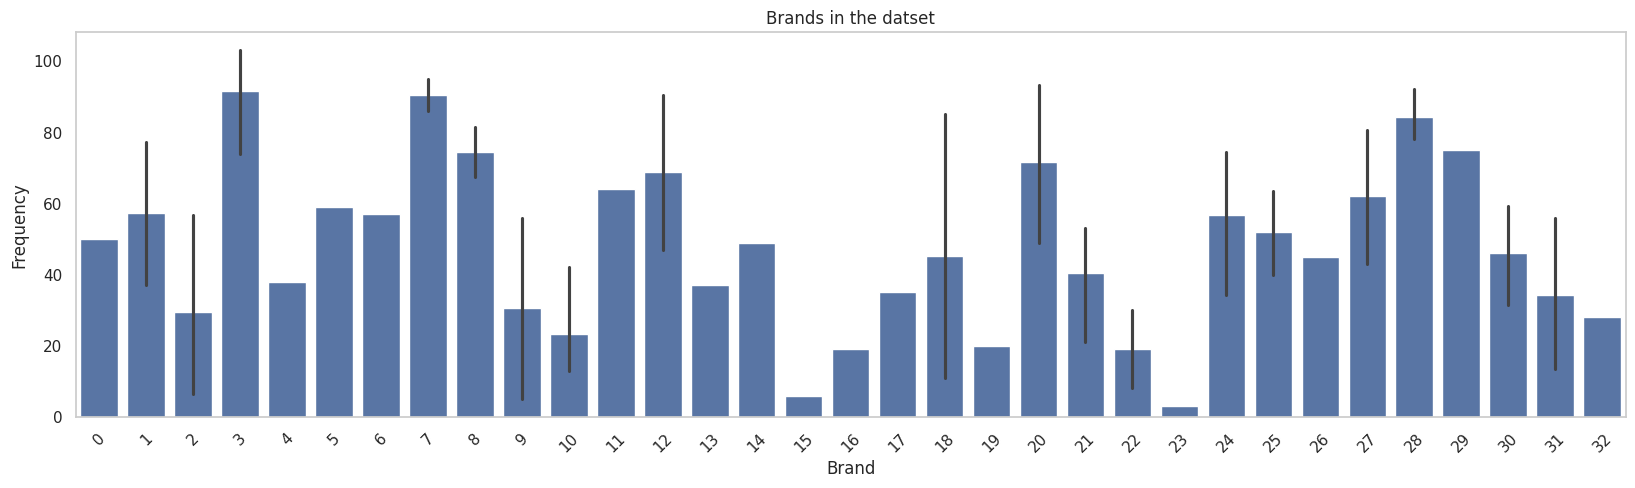

In [69]:
a=np.arange(1,104)


import seaborn as sb


ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y=a,data=df)
plt.grid(axis='y')
plt.title('Brands in the datset')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32')])

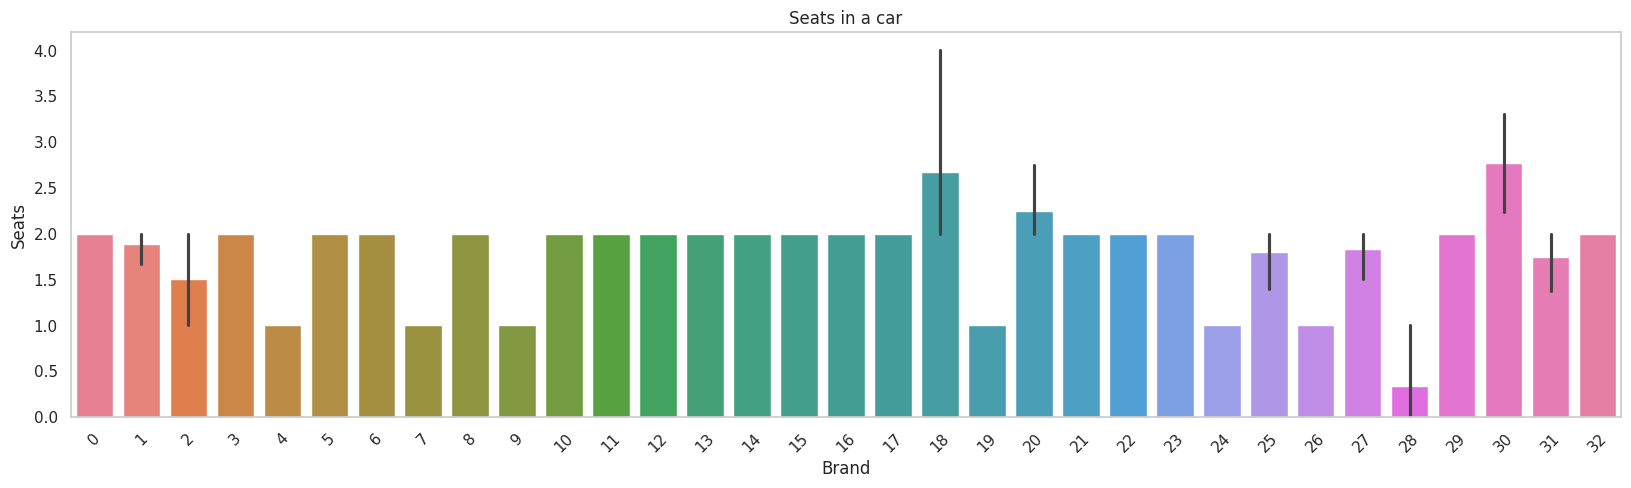

In [70]:
#Number of seats in each car
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='Seats',data=df,palette='husl')
plt.grid(axis='y')
plt.title('Seats in a car')
plt.xlabel('Brand')
plt.ylabel('Seats')
plt.xticks(rotation=45)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32')])

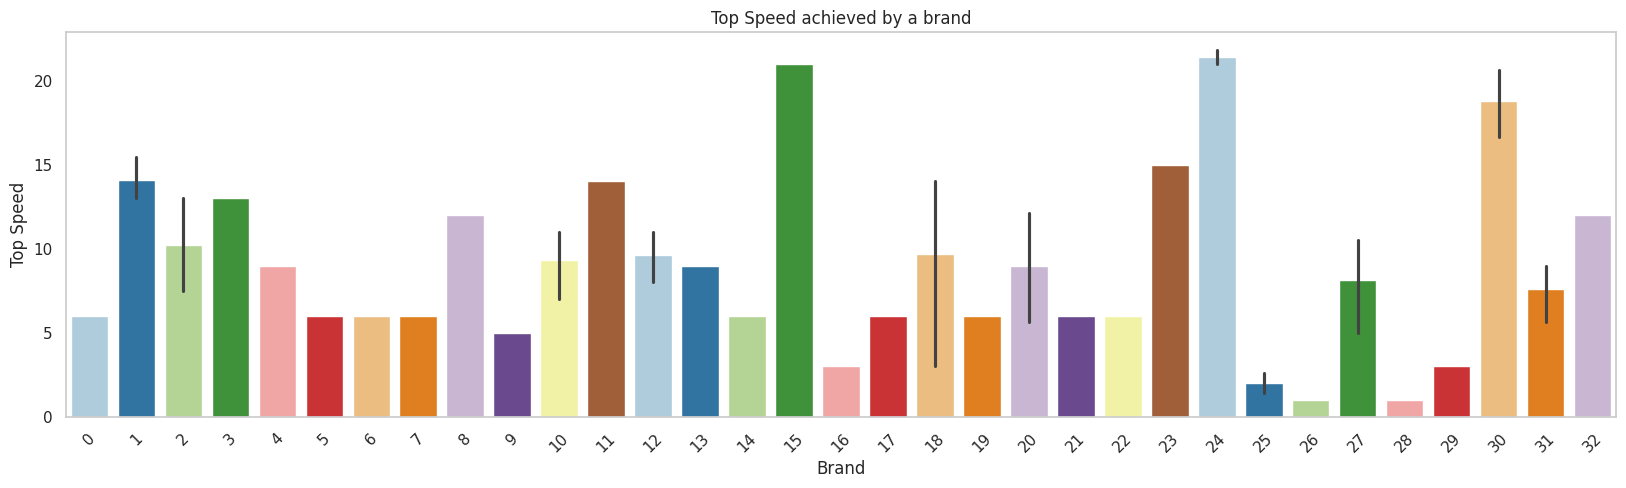

In [71]:
#Top speeds achieved by the cars of a brand
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='TopSpeed_KmH',data=df,palette='Paired')
plt.grid(axis='y')
plt.title('Top Speed achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Top Speed')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Plug Type')

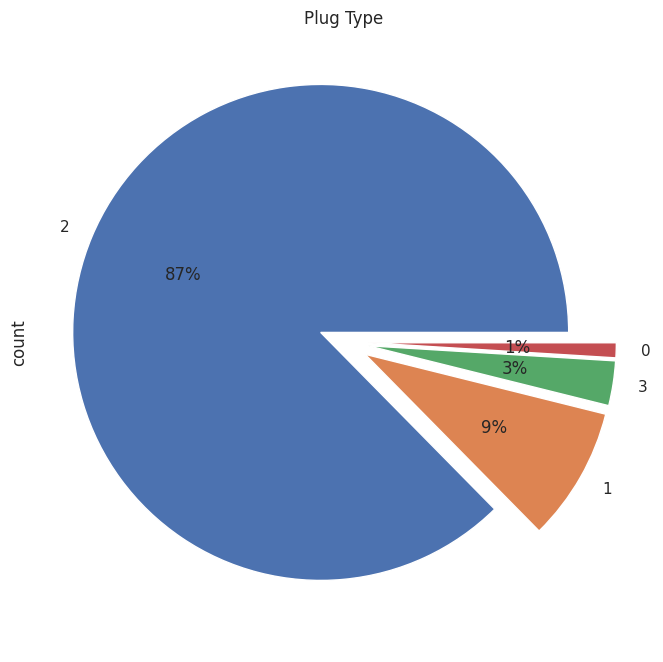

In [72]:

#Type of Plug used for charging
df['PlugType'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(.1,.1,.1,.1))
plt.title('Plug Type')

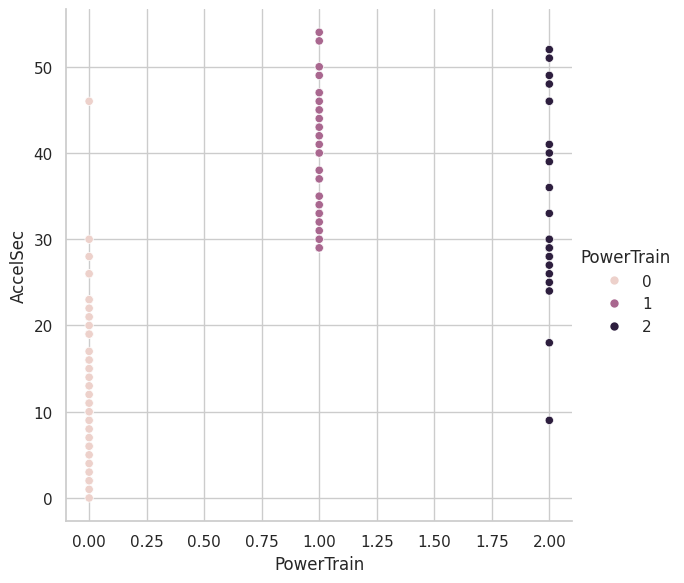

In [73]:
sns.relplot(x="PowerTrain", y="AccelSec", height=6,hue="PowerTrain",data=df)

In [74]:
df.corr()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
Brand,1.000000,-0.401572,0.010264,0.021076,0.060537,-0.221659,0.100688,-0.188137,0.056464,-0.231104,-0.275860,-0.002040,0.122233,-0.190202
Model,-0.401572,1.000000,-0.050879,0.057176,-0.077762,0.022491,0.005442,0.144293,-0.007609,0.023750,0.261255,0.068414,-0.049640,0.111227
AccelSec,0.010264,-0.050879,1.000000,-0.920673,-0.737660,-0.497302,-0.802117,-0.352552,0.610827,-0.112838,-0.396870,-0.603694,-0.168084,-0.831104
TopSpeed_KmH,0.021076,0.057176,-0.920673,1.000000,0.756068,0.444486,0.817411,0.349092,-0.567529,0.054147,0.477244,0.650718,0.189824,0.843350
Range_Km,0.060537,-0.077762,-0.737660,0.756068,1.000000,0.424530,0.821237,0.411901,-0.467350,0.104279,0.351384,0.595759,0.335400,0.768121
Efficiency_WhKm,-0.221659,0.022491,-0.497302,0.444486,0.424530,1.000000,0.405366,0.116273,-0.447413,-0.060855,0.433367,0.679746,0.302620,0.665857
FastCharge_KmH,0.100688,0.005442,-0.802117,0.817411,0.821237,0.405366,1.000000,0.331404,-0.458178,0.126715,0.397805,0.616686,0.201503,0.762814
RapidCharge,-0.188137,0.144293,-0.352552,0.349092,0.411901,0.116273,0.331404,1.000000,-0.274797,0.539160,0.223577,0.189954,0.340828,0.306526
PowerTrain,0.056464,-0.007609,0.610827,-0.567529,-0.467350,-0.447413,-0.458178,-0.274797,1.000000,-0.039763,-0.349484,-0.497850,-0.263083,-0.617321
PlugType,-0.231104,0.023750,-0.112838,0.054147,0.104279,-0.060855,0.126715,0.539160,-0.039763,1.000000,0.066463,-0.163959,-0.095449,0.040580


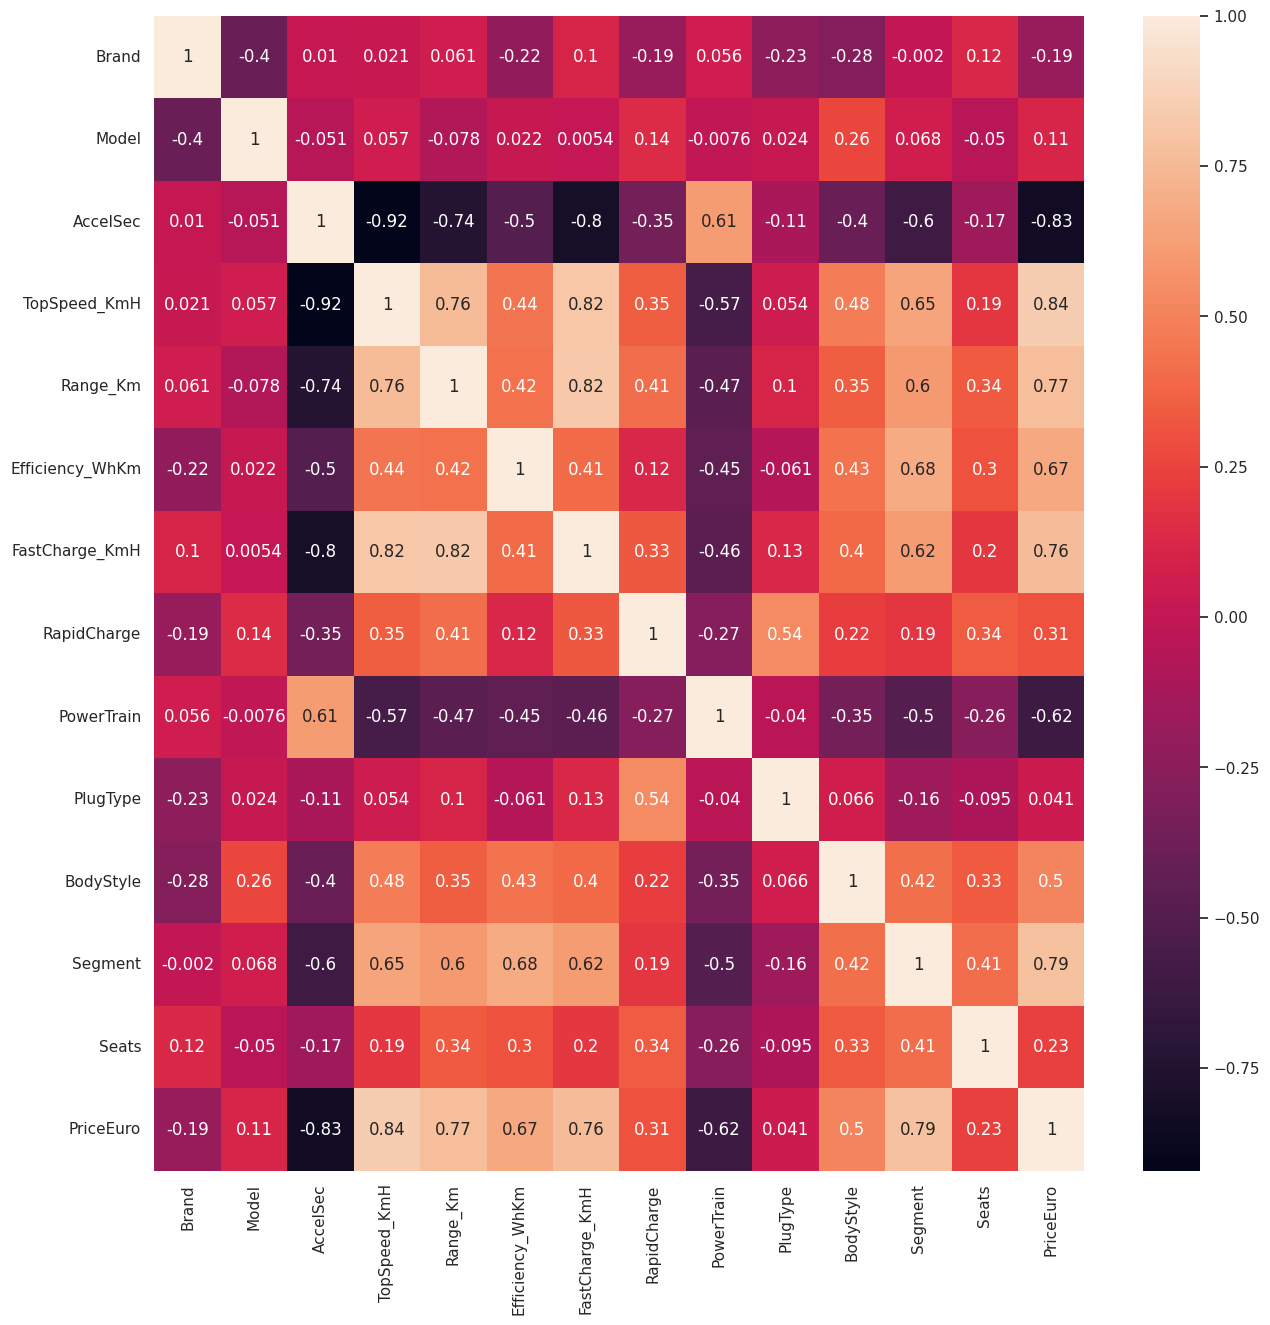

In [75]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

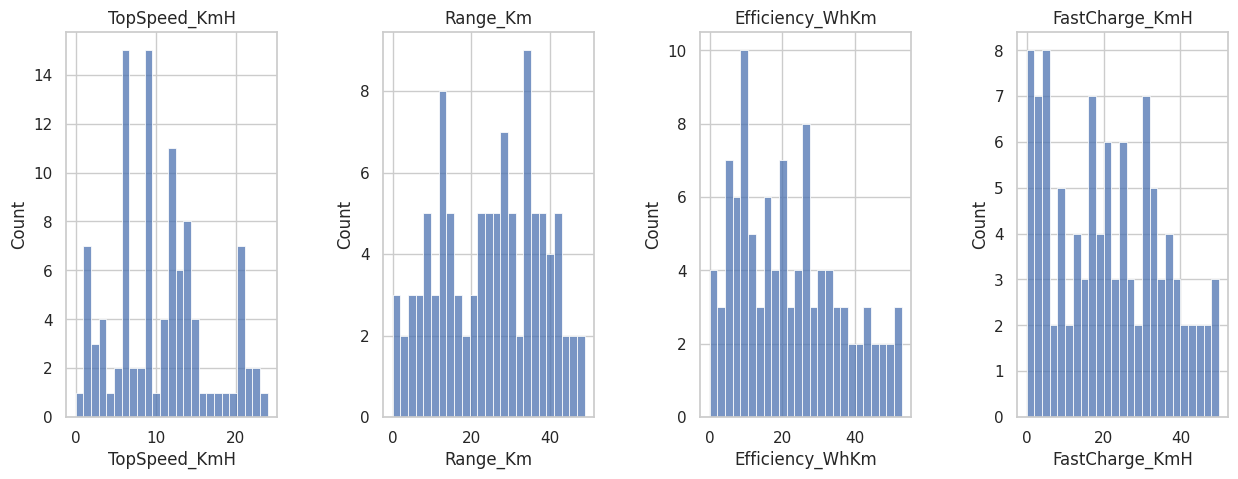

In [76]:
plt.figure(1, figsize=(15,5))
n=0

for x in ['TopSpeed_KmH', 'Range_Km' ,'Efficiency_WhKm'  ,'FastCharge_KmH']:
  n += 1
  plt.subplot(1,4,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.histplot(df[x], bins= 25)
  plt.title(f'{x}')
plt.show()

###K-Means Clustering

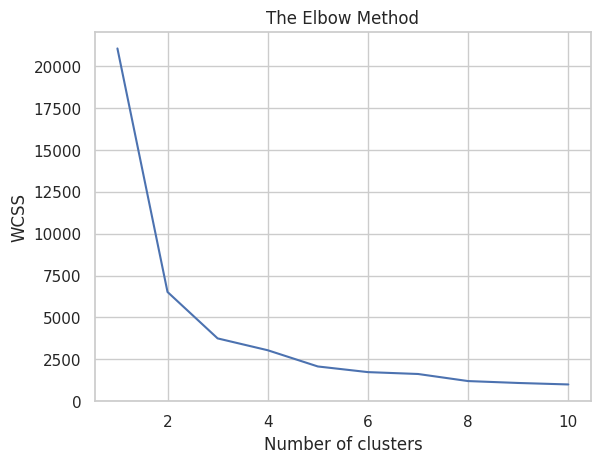

In [77]:
X = df.iloc[:, [3, 4]].values


# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [78]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

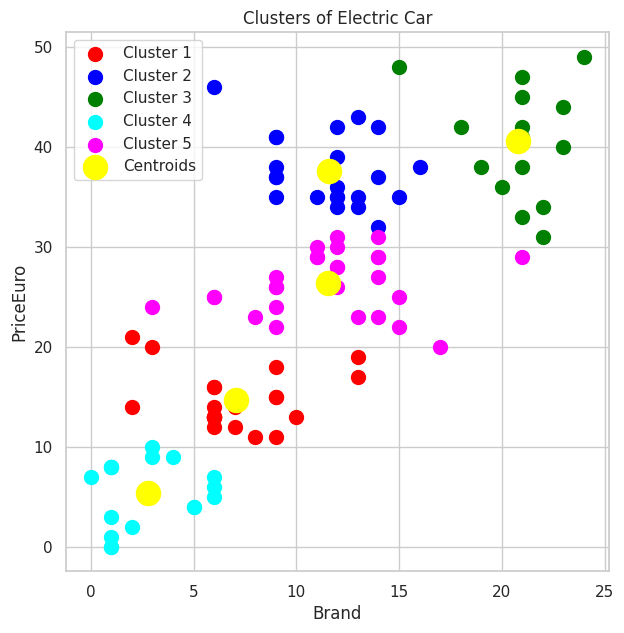

In [79]:
# Visualising the clusters
plt.figure(figsize=(7,7))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Electric Car')
plt.xlabel('Brand')
plt.ylabel('PriceEuro')
plt.legend()
plt.show()



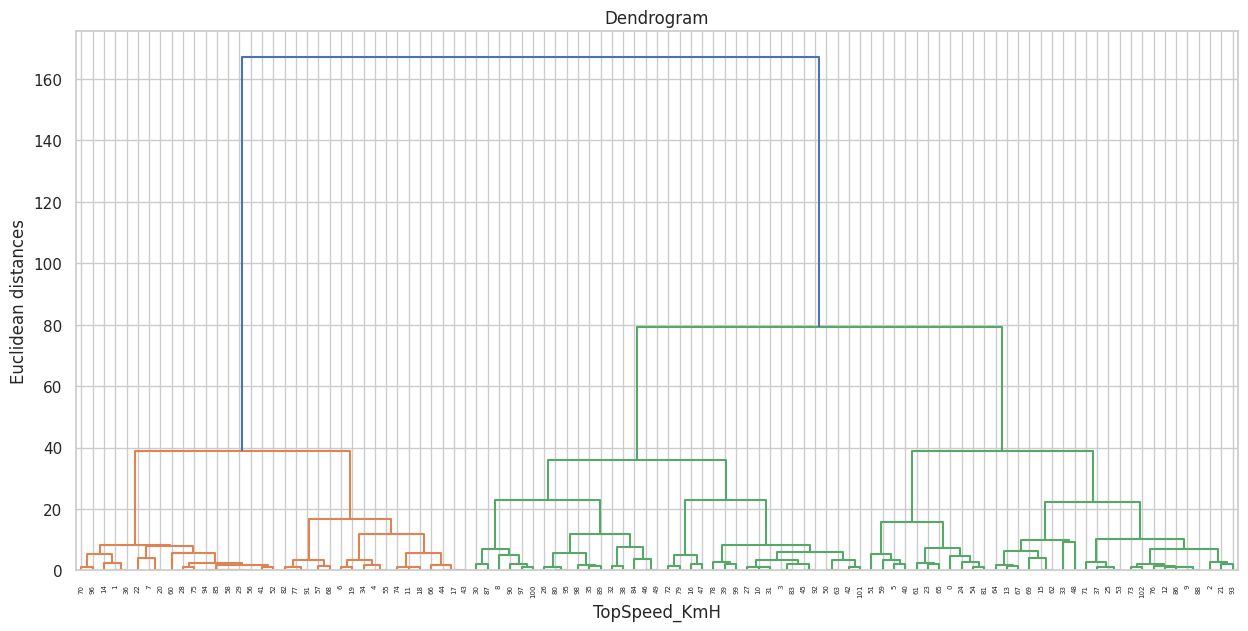

In [80]:
plt.figure(figsize=(15,7))
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('TopSpeed_KmH')
plt.ylabel('Euclidean distances')
plt.show()